In [1]:
# # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import os
import json
from matplotlib import cm

In [4]:
data_csv = "Resources/project_one_data.csv"

In [5]:
project_one_data = pd.read_csv(data_csv)
project_one_data

,Unnamed: 0,Serial Number,State,Transportation,Wages,Education,Parent Origin,Age,Internet,Region,Laptop,# of Vehicles
0,0,84,1,NaN,0.0,19.0,0.0,19,NaN,3,NaN,NaN
1,1,154,1,1.0,52000.0,20.0,0.0,55,1.0,3,1.0,3.0
2,2,154,1,11.0,0.0,16.0,0.0,56,1.0,3,1.0,3.0
3,3,154,1,NaN,0.0,19.0,0.0,21,1.0,3,1.0,3.0
4,4,154,1,NaN,0.0,19.0,0.0,21,1.0,3,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2582037,3132789,1490418,56,NaN,0.0,16.0,0.0,86,3.0,4,2.0,0.0
2582038,3132790,1490639,56,1.0,50000.0,20.0,0.0,59,1.0,4,1.0,1.0
2582039,3132791,1490649,56,NaN,6600.0,20.0,0.0,58,NaN,4,NaN,NaN
2582040,3132792,1491926,56,1.0,600.0,21.0,0.0,29,1.0,4,1.0,2.0


In [6]:
project_one_data['Region'] = project_one_data['Region'].replace({1: "Northeast", 2: "Midwest", 3: 'South', 4: 'West', 
                                                                 9: "Puerto Rico"})


In [7]:
project_one_data['State'] = project_one_data['State'].replace({1: 'AL', 2: 'AK', 3: '?', 4: 'AZ', 5: 'AR', 6: 'CA', 7: '?', 
                                                               8: 'CO', 9: 'CT', 10: 'DE', 11: 'DC', 12: 'FL', 13: 'GA', 
                                                               14: '?', 15: 'HI', 16: 'ID', 17: 'IL', 18: 'IN', 19: 'IA', 
                                                               20: 'KS', 21: 'KY', 22: 'LA', 23: 'ME', 24: 'MD', 25: 'MA', 
                                                               26: 'MI', 27: 'MN', 28: 'MS', 29: 'MO', 30: 'MT', 31: 'NE',
                                                               32: 'NV', 33: 'NH', 34: 'NJ', 35: 'NM', 36: 'NY', 37: 'NC',
                                                               38: 'ND', 39: 'OH', 40: 'OK', 41: 'OR', 42: 'PA', 43: '?',
                                                               44: 'RI', 45: 'SC', 46: 'SD', 47: 'TN', 48: 'TX', 49: 'UT',
                                                               50: 'VT', 51: 'VA', 52: '?', 53: 'WA', 54: 'WV', 55: 'WI', 
                                                               56: 'WY', 72: "PR"})


In [8]:
project_one_data['State'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [9]:
adults = pd.DataFrame(project_one_data[project_one_data["Age"]>=16])
adults

,Unnamed: 0,Serial Number,State,Transportation,Wages,Education,Parent Origin,Age,Internet,Region,Laptop,# of Vehicles
0,0,84,AL,NaN,0.0,19.0,0.0,19,NaN,South,NaN,NaN
1,1,154,AL,1.0,52000.0,20.0,0.0,55,1.0,South,1.0,3.0
2,2,154,AL,11.0,0.0,16.0,0.0,56,1.0,South,1.0,3.0
3,3,154,AL,NaN,0.0,19.0,0.0,21,1.0,South,1.0,3.0
4,4,154,AL,NaN,0.0,19.0,0.0,21,1.0,South,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2582037,3132789,1490418,WY,NaN,0.0,16.0,0.0,86,3.0,West,2.0,0.0
2582038,3132790,1490639,WY,1.0,50000.0,20.0,0.0,59,1.0,West,1.0,1.0
2582039,3132791,1490649,WY,NaN,6600.0,20.0,0.0,58,NaN,West,NaN,NaN
2582040,3132792,1491926,WY,1.0,600.0,21.0,0.0,29,1.0,West,1.0,2.0


In [10]:
region_adults_count = adults.groupby(["Region"]).count()["Wages"]
region_adults_mean = adults.groupby(["Region"]).mean()["Wages"]
region_adults_median = adults.groupby(["Region"]).median()["Wages"]

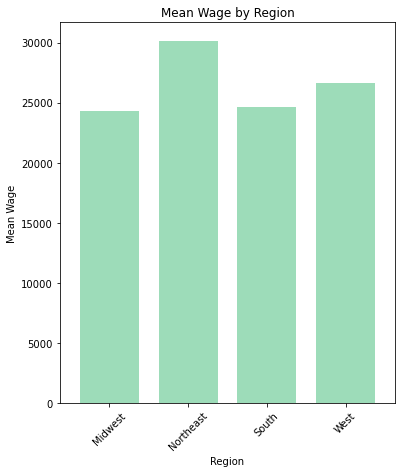

In [11]:
region_adults_mean.plot(kind="bar", color="#3CBB75FF", alpha=.5, width=.75, figsize=(6,7))
plt.xticks(rotation=45)
# plt.xlim(-.9, len("Drug Regimen")-.1)
# plt.ylim(0, max(measurements) +50)
plt.title("Mean Wage by Region")
plt.xlabel("Region")
plt.ylabel("Mean Wage")
plt.savefig("./Images/region_barchart.png")
plt.show()

In [12]:
state_count = project_one_data.groupby(["State"]).count()["Wages"]
state_mean = project_one_data.groupby(["State"]).mean()["Wages"]
state_median = project_one_data.groupby(["State"]).median()["Wages"]
state_adults_count = adults.groupby(["State"]).count()["Wages"]
state_adults_mean = adults.groupby(["State"]).mean()["Wages"]
state_adults_median = adults.groupby(["State"]).median()["Wages"]

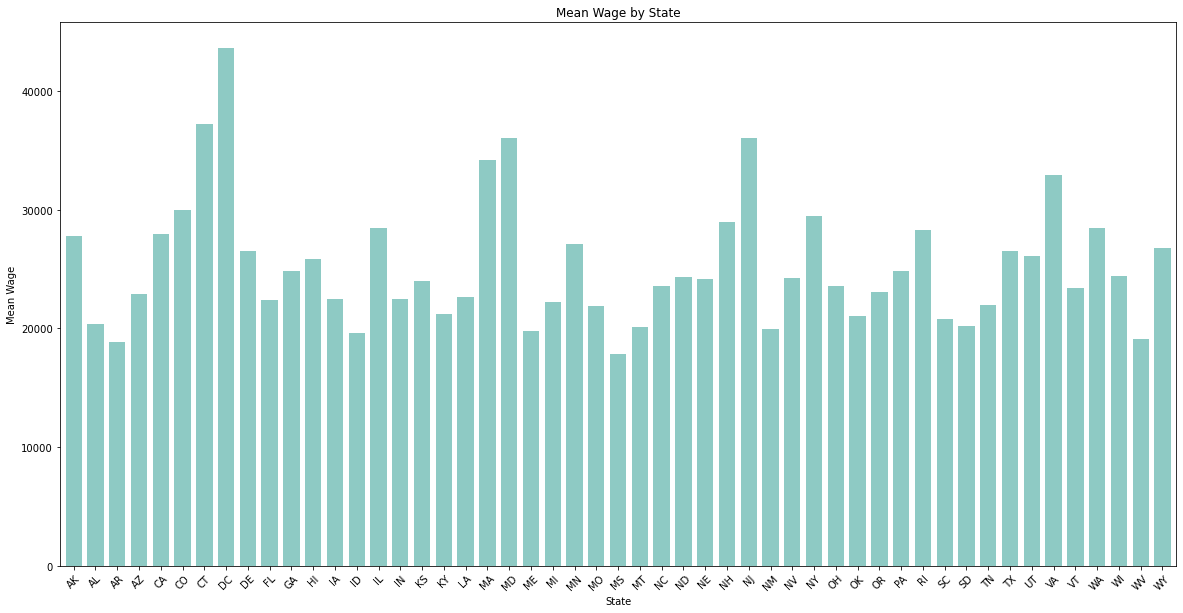

In [13]:
state_adults_mean.plot(kind="bar", color="#1F968BFF", alpha=.5, width=.75, figsize=(20,10))
plt.xticks(rotation=45)
# plt.xlim(-.9, len("Drug Regimen")-.1)
# plt.ylim(0, max(measurements) +50)
plt.title("Mean Wage by State")
plt.xlabel("State")
plt.ylabel("Mean Wage")
plt.savefig("./Images/state_barchart.png")
plt.show()

In [14]:
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

In [15]:
wages = []
space = '\n'
for state in states:
    wage_list = adults.loc[adults["State"]==state, "Wages"]
    wages.append(wage_list)
    quartiles = wage_list.quantile([.25,.5,.75])
    lowerq = quartiles.loc[0.25]
    upperq = quartiles.loc[0.75]
    iqr = upperq-lowerq
    print(f"{state} Data: ")
    print(f"The lower quartile of {state} is: {lowerq}")
    print(f"The upper quartile of {state} is: {upperq}")
    print(f"The interquartile range of {state} is: {iqr}")
    print(f"The the median of {state} is: {quartiles.loc[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
#     print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers. {space}")

AL Data: 
The lower quartile of AL is: 0.0
The upper quartile of AL is: 30000.0
The interquartile range of AL is: 30000.0
The the median of AL is: 1800.0 
Values above 75000.0 could be outliers. 

AK Data: 
The lower quartile of AK is: 0.0
The upper quartile of AK is: 41000.0
The interquartile range of AK is: 41000.0
The the median of AK is: 12000.0 
Values above 102500.0 could be outliers. 

AZ Data: 
The lower quartile of AZ is: 0.0
The upper quartile of AZ is: 33300.0
The interquartile range of AZ is: 33300.0
The the median of AZ is: 3300.0 
Values above 83250.0 could be outliers. 

AR Data: 
The lower quartile of AR is: 0.0
The upper quartile of AR is: 28000.0
The interquartile range of AR is: 28000.0
The the median of AR is: 1500.0 
Values above 70000.0 could be outliers. 

CA Data: 
The lower quartile of CA is: 0.0
The upper quartile of CA is: 38000.0
The interquartile range of CA is: 38000.0
The the median of CA is: 5000.0 
Values above 95000.0 could be outliers. 

CO Data: 
The

TN Data: 
The lower quartile of TN is: 0.0
The upper quartile of TN is: 31200.0
The interquartile range of TN is: 31200.0
The the median of TN is: 4200.0 
Values above 78000.0 could be outliers. 

TX Data: 
The lower quartile of TX is: 0.0
The upper quartile of TX is: 37200.0
The interquartile range of TX is: 37200.0
The the median of TX is: 7900.0 
Values above 93000.0 could be outliers. 

UT Data: 
The lower quartile of UT is: 0.0
The upper quartile of UT is: 38500.0
The interquartile range of UT is: 38500.0
The the median of UT is: 10000.0 
Values above 96250.0 could be outliers. 

VT Data: 
The lower quartile of VT is: 0.0
The upper quartile of VT is: 37000.0
The interquartile range of VT is: 37000.0
The the median of VT is: 7300.0 
Values above 92500.0 could be outliers. 

VA Data: 
The lower quartile of VA is: 0.0
The upper quartile of VA is: 47000.0
The interquartile range of VA is: 47000.0
The the median of VA is: 12000.0 
Values above 117500.0 could be outliers. 

WA Data: 
Th

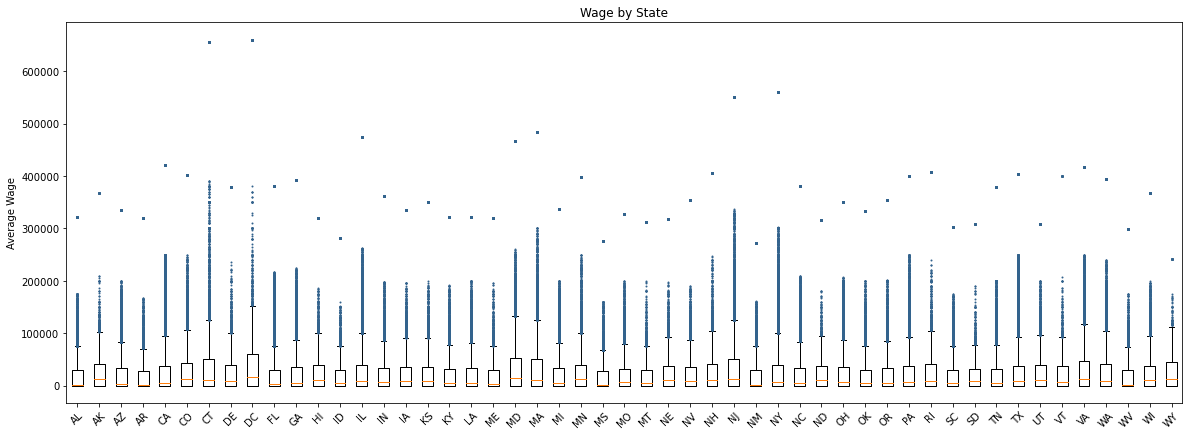

In [16]:
flierprops = dict(markerfacecolor = "#33638DFF", markersize=1, markeredgecolor = "#33638DFF")
fig = plt.figure(figsize=(20,7))
plt.boxplot(wages, flierprops = flierprops)
# plt.boxplot(vert=False)
plt.xticks(rotation=45)
plt.title("Wage by State")
plt.ylabel("Average Wage")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,
            40,41,42,43,44,45,46,47,48,49,50,51], ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'])
plt.savefig("./Images/location_boxplot.png")
plt.show()